# TODO: 
* Add Neural Network
* Improve data preprocessing
* Perform more in-depth data analysis
* Improve model tuning
* DESCRIPTIONS! 

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score


%matplotlib inline

## Data Loading

In [2]:
df = pd.read_csv('heart.csv')

# Overview of the dataset
Let's perform initial analysis of the dataset.

Dataset consists of 303 rows and 14 columns.  
Columns: 
* age - 
* sex - 
* cp - 
* trestbps - 
* chol - 
* fbs - 
* restecg - 
* thalach - 
* exang - 
* oldpeak - 
* slope - 
* ca - 
* thal - 
* target - 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Fortunately there are no missing values - this decreases the complexity of preprocessing stage.

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Dataset analysis

In [7]:
diseaseNumber = len(df[df['target'] == 1])
noDiseaseNumber = len(df[df['target'] == 0])

print(f'Number of patients with a disease: {diseaseNumber}')
print(f'Number of patients with no disease: {noDiseaseNumber}')

Number of patients with a disease: 165
Number of patients with no disease: 138


### Dependencies between various attributes

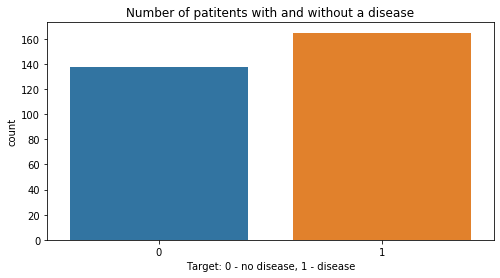

In [8]:
plt.figure(figsize=(8,4))
sns.countplot(x='target', data=df)
plt.title('Number of patitents with and without a disease')
plt.xlabel('Target: 0 - no disease, 1 - disease')
plt.show() # required since lack of this command shows the ouput of plt.title(...)

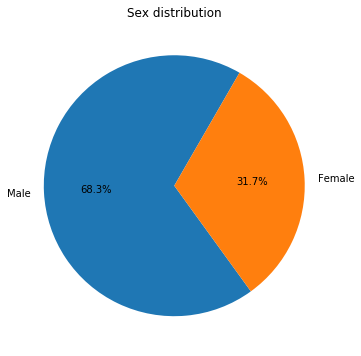

In [9]:
plt.figure(figsize=(8,6))
male = len(df[df['sex'] == 1])
female = len(df[df['sex'] == 0])
categories=[male, female]
labels = ['Male', 'Female']
plt.pie(categories, labels=labels, autopct='%1.1f%%', startangle=60)
plt.title('Sex distribution')
plt.show() # required since lack of this command shows previous ouputs

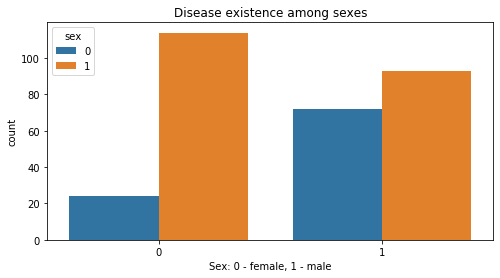

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(x='target', hue='sex', data=df)
plt.xlabel('Sex: 0 - female, 1 - male')
plt.title('Disease existence among sexes')
plt.show()

### Age
It seems that the highest incidence is among 50-65 year olds.

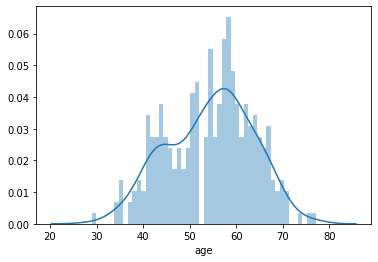

In [11]:
sns.distplot(df['age'], bins=50)

In [12]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

### Chest Pain Type
Most of the time chest pain of type 2 means that a person is ill.   
In case of type 1 the dependence is opposite - in over 100 of 140 cases a person with this pain had no disease.

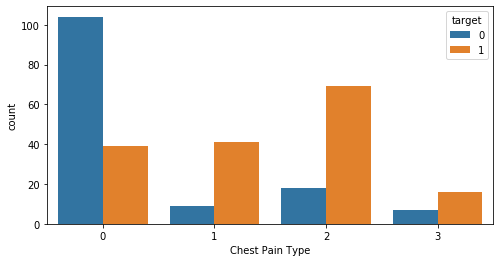

In [13]:
plt.figure(figsize=(8,4))
sns.countplot(x='cp', hue='target', data=df)
plt.xlabel('Chest Pain Type')
plt.show()

# Feature engineering

The approach to the categorical feature works as follows: 
1. Create dummy variables out of the available values
2. Drop the original column
3. Add dummy variable columns to the dataset

In [14]:
def create_categorical_feature(df, column, prefix=None):
    if prefix is None: 
        prefix = column
    categorical = pd.get_dummies(df[column], prefix=prefix)
    df.drop(column, axis=1, inplace=True)
    return pd.concat([df, categorical], axis=1)

### Chest Pain Type, Thal, Slope

In [15]:
df = create_categorical_feature(df, 'cp')
df = create_categorical_feature(df, 'thal')
df = create_categorical_feature(df, 'slope')

### Age
Age is a continous value, but it is better to split it into bins denoting age ranges.

In [16]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
group_names = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-100']
age_categories = pd.cut(df['age'], bins, labels=group_names)
age_categories.value_counts()

51-60     129
41-50      76
61-70      73
31-40      18
71-80       6
21-30       1
81-100      0
0-20        0
Name: age, dtype: int64

# Split the set into attributes and result

In [17]:
X = df.drop('target', axis=1)
y = df['target']

## Normalize data TODO: chyba powinno byc przed train/test split

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Create train / test dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Models
The following models will be used in the task: 
* Logistic Regression
* Support Vector Machine
* Random Forest
* Simple Neural Network

Since it is rather simple task, a Grid Search will be performed on each and every model. 

In [20]:
def measure_classifier_accuracy(classifier, X, y):
    predictions = classifier.predict(X)
    return accuracy_score(y, predictions), confusion_matrix(y, predictions)

### Logistic Regression

In [93]:
parameters = {
    'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10., 100.],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

grid_logistic_regression = GridSearchCV(LogisticRegression(), parameters, cv=10, iid=True, n_jobs=-1)
grid_logistic_regression.fit(X_train, y_train)

logistic_regression = grid_logistic_regression.best_estimator_
logistic_regression_accuracy, cm_logistic_regression = measure_classifier_accuracy(logistic_regression, X_test, y_test)

### Support Vector Machine

In [22]:
parameters = {
    'C': [0.001, 0.01, 0.1, 1.0, 5.0, 10., 100.],
    'kernel': ['rbf', 'linear', 'sigmoid', 'poly']
}

grid_svm = GridSearchCV(svm.SVC(), parameters, cv=10, iid=True, n_jobs=-1)
grid_svm.fit(X_train, y_train)

SVM = grid_svm.best_estimator_
svm_accuracy, cm_svm = measure_classifier_accuracy(SVM, X_test, y_test)

### Random Forest

In [85]:
parameters = {
    'n_estimators': [10, 100, 300, 500],
    'max_depth': [None, 20] + list(np.arange(2,5)),
    'max_features': ['auto', 0.5, None]
}

grid_random_forest = GridSearchCV(RandomForestClassifier(), parameters, cv=10, n_jobs=-1)
grid_random_forest.fit(X_train, y_train)

random_forest = grid_random_forest.best_estimator_
random_forest_accuracy, cm_random_forest = measure_classifier_accuracy(random_forest, X_test, y_test)

/home/pietrek/ML/CNN/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Simple Neural Network

In [86]:
random_forest_accuracy

0.87

# Model efficiency comparison

## Confusion Matrices comparison

Text(0.5, 1.05, "Classificators' Confusion Matrices")

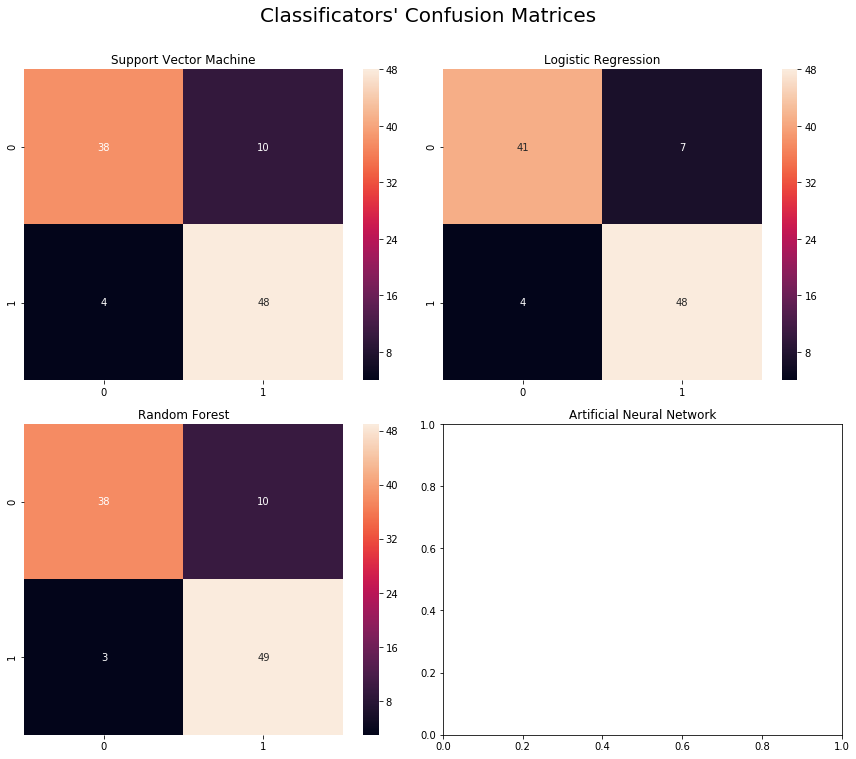

In [95]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))
        
sns.heatmap(cm_svm, annot=True, ax=ax[0][0])
ax[0][0].set_title('Support Vector Machine')

sns.heatmap(cm_logistic_regression, annot=True, ax=ax[0][1])
ax[0][1].set_title('Logistic Regression')

sns.heatmap(cm_random_forest, annot=True, ax=ax[1][0])
ax[1][0].set_title('Random Forest')

# sns.heatmap(cm_svm, annot=True, ax=ax[1][1])
ax[1][1].set_title('Artificial Neural Network')

fig.tight_layout()
fig.suptitle('Classificators\' Confusion Matrices', position=(.5,1.05), fontsize=20)

## Accuracy comparison

In [96]:
results = [
    ['Random Forest', random_forest_accuracy],
    ['SVM', svm_accuracy],
    ['Logistic Regression', logistic_regression_accuracy],
    ['Neural Network', None]
]
results = pd.DataFrame(data=results, columns=['Name', 'Score'])
results

,Name,Score
0,Random Forest,0.87
1,SVM,0.86
2,Logistic Regression,0.89
3,Neural Network,NaN


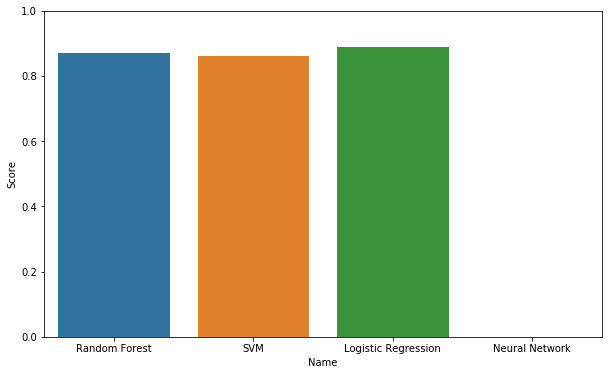

In [97]:
plt.figure(figsize=(10,6))
plot = sns.barplot(x='Name', y='Score', data=results)
plot.set(ylim=(0, 1))
plt.show()

### The results show that the best classifier for this task is Logistic Regression that scored accuracy =  0.89.